In [1]:
# Loading processed infinite square lattice data
import numpy as np

prob_swap_sweep_size = 100+1
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)

results_inf = np.load('FOLDER_LOCATION/Infinite networks/Infinite square/sweep_prob_swap_prob_succ_swap/results.npy')
prob_succ_swap_range = [0.5, 0.75, 1]
virtual_node_degree_mean_inf = [results_inf[i*len(prob_swap_range)+j][0] for i in range(len(prob_succ_swap_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_mean_inf = [results_inf[i*len(prob_swap_range)+j][2] for i in range(len(prob_succ_swap_range)) for j in range(len(prob_swap_range))]

virtual_node_degree_mean_inf = np.reshape(virtual_node_degree_mean_inf, (len(prob_succ_swap_range), len(prob_swap_range)))
virtual_neighbourhood_size_mean_inf = np.reshape(virtual_neighbourhood_size_mean_inf, (len(prob_succ_swap_range), len(prob_swap_range)))

In [2]:
# Loading raw data
results = np.load('FOLDER_LOCATION/Finite networks/Finite square/sweep_prob_swap_prob_succ_swap/Long runs/results.npy', allow_pickle=True)

virtual_node_degree = [results[i][18] for i in range(len(prob_swap_range))]
virtual_neighbourhood_size = [results[i][19] for i in range(len(prob_swap_range))]

virtual_node_degree = np.reshape(virtual_node_degree, (1, len(prob_swap_range), 11, 11, 25000))
virtual_neighbourhood_size = np.reshape(virtual_neighbourhood_size, (1, len(prob_swap_range), 11, 11, 25000))

In [3]:
# Prep raw data for post-processing
virtual_node_degree_center =  virtual_node_degree[0, :, 5, 5, :]
virtual_node_degree_corner =  np.dstack((virtual_node_degree[0, :, 10, 10, :], virtual_node_degree[0, :, 10, 0, :], virtual_node_degree[0, :, 0, 0, :], virtual_node_degree[0, :, 0, 10, :]))
virtual_node_degree_next_to_corner =  np.dstack((virtual_node_degree[0, :, 1, 0, :], virtual_node_degree[0, :, 0, 1, :], virtual_node_degree[0, :, 0, 9, :], virtual_node_degree[0, :, 1, 10, :], virtual_node_degree[0, :, 9, 10, :], virtual_node_degree[0, :, 10, 9, :], virtual_node_degree[0, :, 10, 1, :], virtual_node_degree[0, :, 9, 0, :]))
virtual_node_degree_edge_center =  np.dstack((virtual_node_degree[0, :, 10, 5, :], virtual_node_degree[0, :, 5, 0, :], virtual_node_degree[0, :, 0, 5, :], virtual_node_degree[0, :, 5, 10, :]))
virtual_node_degree_mid_center =  np.dstack((virtual_node_degree[0, :, 9, 5, :], virtual_node_degree[0, :, 5, 1, :], virtual_node_degree[0, :, 1, 5, :], virtual_node_degree[0, :, 5, 9, :]))
virtual_node_degree_mid_corner =  np.dstack((virtual_node_degree[0, :, 9, 1, :], virtual_node_degree[0, :, 1, 1, :], virtual_node_degree[0, :, 1, 9, :], virtual_node_degree[0, :, 9, 9, :]))

virtual_neighbourhood_size_center =  virtual_neighbourhood_size[0, :, 5, 5, :]
virtual_neighbourhood_size_corner =  np.dstack((virtual_neighbourhood_size[0, :, 10, 10, :], virtual_neighbourhood_size[0, :, 10, 0, :], virtual_neighbourhood_size[0, :, 0, 0, :], virtual_neighbourhood_size[0, :, 0, 10, :]))
virtual_neighbourhood_size_next_to_corner =  np.dstack((virtual_neighbourhood_size[0, :, 1, 0, :], virtual_neighbourhood_size[0, :, 0, 1, :], virtual_neighbourhood_size[0, :, 0, 9, :], virtual_neighbourhood_size[0, :, 1, 10, :], virtual_neighbourhood_size[0, :, 9, 10, :], virtual_neighbourhood_size[0, :, 10, 9, :], virtual_neighbourhood_size[0, :, 10, 1, :], virtual_neighbourhood_size[0, :, 9, 0, :]))
virtual_neighbourhood_size_edge_center =  np.dstack((virtual_neighbourhood_size[0, :, 10, 5, :], virtual_neighbourhood_size[0, :, 5, 0, :], virtual_neighbourhood_size[0, :, 0, 5, :], virtual_neighbourhood_size[0, :, 5, 10, :]))
virtual_neighbourhood_size_mid_center =  np.dstack((virtual_neighbourhood_size[0, :, 1, 5, :], virtual_neighbourhood_size[0, :, 9, 5, :], virtual_neighbourhood_size[0, :, 5, 1, :], virtual_neighbourhood_size[0, :, 5, 9, :]))
virtual_neighbourhood_size_mid_corner =  np.dstack((virtual_neighbourhood_size[0, :, 1, 1, :], virtual_neighbourhood_size[0, :, 1, 9, :], virtual_neighbourhood_size[0, :, 9, 1, :], virtual_neighbourhood_size[0, :, 9, 9, :]))

In [4]:
# Post-processing
virtual_node_degree_center_mean = np.empty(prob_swap_sweep_size)
virtual_node_degree_corner_mean = np.empty(prob_swap_sweep_size)
virtual_node_degree_edge_center_mean = np.empty(prob_swap_sweep_size)
virtual_node_degree_next_to_corner_mean = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_center_mean = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_corner_mean = np.empty(prob_swap_sweep_size)

virtual_neighbourhood_size_center_mean = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_corner_mean = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_next_to_corner_mean = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_edge_center_mean = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_center_mean = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_corner_mean = np.empty(prob_swap_sweep_size)

virtual_node_degree_center_10pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_corner_10pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_next_to_corner_10pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_edge_center_10pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_center_10pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_corner_10pct = np.empty(prob_swap_sweep_size)

virtual_neighbourhood_size_center_10pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_corner_10pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_next_to_corner_10pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_edge_center_10pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_center_10pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_corner_10pct = np.empty(prob_swap_sweep_size)

virtual_node_degree_center_25pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_corner_25pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_next_to_corner_25pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_edge_center_25pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_center_25pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_corner_25pct = np.empty(prob_swap_sweep_size)

virtual_neighbourhood_size_center_25pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_corner_25pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_next_to_corner_25pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_edge_center_25pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_center_25pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_corner_25pct = np.empty(prob_swap_sweep_size)

virtual_node_degree_center_75pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_corner_75pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_next_to_corner_75pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_edge_center_75pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_center_75pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_corner_75pct = np.empty(prob_swap_sweep_size)

virtual_neighbourhood_size_center_75pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_corner_75pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_next_to_corner_75pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_edge_center_75pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_center_75pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_corner_75pct = np.empty(prob_swap_sweep_size)

virtual_node_degree_center_90pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_corner_90pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_next_to_corner_90pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_edge_center_90pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_center_90pct = np.empty(prob_swap_sweep_size)
virtual_node_degree_mid_corner_90pct = np.empty(prob_swap_sweep_size)

virtual_neighbourhood_size_center_90pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_corner_90pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_next_to_corner_90pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_edge_center_90pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_center_90pct = np.empty(prob_swap_sweep_size)
virtual_neighbourhood_size_mid_corner_90pct = np.empty(prob_swap_sweep_size)


for q in range(prob_swap_sweep_size):
    virtual_node_degree_center_mean[q] = np.mean(virtual_node_degree_center[q])
    virtual_node_degree_corner_mean[q] = np.mean(virtual_node_degree_corner[q])
    virtual_node_degree_next_to_corner_mean[q] =  np.mean(virtual_node_degree_next_to_corner[q])
    virtual_node_degree_edge_center_mean[q] = np.mean(virtual_node_degree_edge_center[q])
    virtual_node_degree_mid_center_mean[q] = np.mean(virtual_node_degree_mid_center[q])
    virtual_node_degree_mid_corner_mean[q] = np.mean(virtual_node_degree_mid_corner[q])

    virtual_neighbourhood_size_center_mean[q] = np.mean(virtual_neighbourhood_size_center[q])
    virtual_neighbourhood_size_corner_mean[q] = np.mean(virtual_neighbourhood_size_corner[q])
    virtual_neighbourhood_size_next_to_corner_mean[q] = np.mean(virtual_neighbourhood_size_next_to_corner[q])
    virtual_neighbourhood_size_edge_center_mean[q] = np.mean(virtual_neighbourhood_size_edge_center[q])
    virtual_neighbourhood_size_mid_center_mean[q] = np.mean(virtual_neighbourhood_size_mid_center[q])
    virtual_neighbourhood_size_mid_corner_mean[q] = np.mean(virtual_neighbourhood_size_mid_corner[q])
    
    virtual_node_degree_center_10pct[q] = np.percentile(virtual_node_degree_center[q], 10)
    virtual_node_degree_corner_10pct[q] = np.percentile(virtual_node_degree_corner[q], 10)
    virtual_node_degree_next_to_corner_10pct[q] = np.percentile(virtual_node_degree_next_to_corner[q], 10)
    virtual_node_degree_edge_center_10pct[q] = np.percentile(virtual_node_degree_edge_center[q], 10)
    virtual_node_degree_mid_center_10pct[q] = np.percentile(virtual_node_degree_mid_center[q], 10)
    virtual_node_degree_mid_corner_10pct[q] = np.percentile(virtual_node_degree_mid_corner[q], 10)
    
    virtual_neighbourhood_size_center_10pct[q] = np.percentile(virtual_neighbourhood_size_center[q], 10)
    virtual_neighbourhood_size_corner_10pct[q] = np.percentile(virtual_neighbourhood_size_corner[q], 10)
    virtual_neighbourhood_size_next_to_corner_10pct[q] = np.percentile(virtual_neighbourhood_size_next_to_corner[q], 10)
    virtual_neighbourhood_size_edge_center_10pct[q] = np.percentile(virtual_neighbourhood_size_edge_center[q], 10)
    virtual_neighbourhood_size_mid_center_10pct[q] = np.percentile(virtual_neighbourhood_size_mid_center[q], 10)
    virtual_neighbourhood_size_mid_corner_10pct[q] = np.percentile(virtual_neighbourhood_size_mid_corner[q], 10)

    virtual_node_degree_center_25pct[q] = np.percentile(virtual_node_degree_center[q], 25)
    virtual_node_degree_corner_25pct[q] = np.percentile(virtual_node_degree_corner[q], 25)
    virtual_node_degree_next_to_corner_25pct[q] = np.percentile(virtual_node_degree_next_to_corner[q], 25)
    virtual_node_degree_edge_center_25pct[q] = np.percentile(virtual_node_degree_edge_center[q], 25)
    virtual_node_degree_mid_center_25pct[q] = np.percentile(virtual_node_degree_mid_center[q], 25)
    virtual_node_degree_mid_corner_25pct[q] = np.percentile(virtual_node_degree_mid_corner[q], 25)
    
    virtual_neighbourhood_size_center_25pct[q] = np.percentile(virtual_neighbourhood_size_center[q], 25)
    virtual_neighbourhood_size_corner_25pct[q] = np.percentile(virtual_neighbourhood_size_corner[q], 25)
    virtual_neighbourhood_size_next_to_corner_25pct[q] = np.percentile(virtual_neighbourhood_size_next_to_corner[q], 25)
    virtual_neighbourhood_size_edge_center_25pct[q] = np.percentile(virtual_neighbourhood_size_edge_center[q], 25)
    virtual_neighbourhood_size_mid_center_25pct[q] = np.percentile(virtual_neighbourhood_size_mid_center[q], 25)
    virtual_neighbourhood_size_mid_corner_25pct[q] = np.percentile(virtual_neighbourhood_size_mid_corner[q], 25)
    
    virtual_node_degree_center_75pct[q] = np.percentile(virtual_node_degree_center[q], 75)
    virtual_node_degree_corner_75pct[q] = np.percentile(virtual_node_degree_corner[q], 75)
    virtual_node_degree_next_to_corner_75pct[q] = np.percentile(virtual_node_degree_next_to_corner[q], 75)
    virtual_node_degree_edge_center_75pct[q] = np.percentile(virtual_node_degree_edge_center[q], 75)
    virtual_node_degree_mid_center_75pct[q] = np.percentile(virtual_node_degree_mid_center[q], 75)
    virtual_node_degree_mid_corner_75pct[q] = np.percentile(virtual_node_degree_mid_corner[q], 75)
    
    virtual_neighbourhood_size_center_75pct[q] = np.percentile(virtual_neighbourhood_size_center[q], 75)
    virtual_neighbourhood_size_corner_75pct[q] = np.percentile(virtual_neighbourhood_size_corner[q], 75)
    virtual_neighbourhood_size_next_to_corner_75pct[q] = np.percentile(virtual_neighbourhood_size_next_to_corner[q], 75)
    virtual_neighbourhood_size_edge_center_75pct[q] = np.percentile(virtual_neighbourhood_size_edge_center[q], 75)
    virtual_neighbourhood_size_mid_center_75pct[q] = np.percentile(virtual_neighbourhood_size_mid_center[q], 75)
    virtual_neighbourhood_size_mid_corner_75pct[q] = np.percentile(virtual_neighbourhood_size_mid_corner[q], 75)
    
    virtual_node_degree_center_90pct[q] = np.percentile(virtual_node_degree_center[q], 90)
    virtual_node_degree_corner_90pct[q] = np.percentile(virtual_node_degree_corner[q], 90)
    virtual_node_degree_next_to_corner_90pct[q] = np.percentile(virtual_node_degree_next_to_corner[q], 90)
    virtual_node_degree_edge_center_90pct[q] = np.percentile(virtual_node_degree_edge_center[q], 90)
    virtual_node_degree_mid_center_90pct[q] = np.percentile(virtual_node_degree_mid_center[q], 90)
    virtual_node_degree_mid_corner_90pct[q] = np.percentile(virtual_node_degree_mid_corner[q], 90)
    
    virtual_neighbourhood_size_center_90pct[q] = np.percentile(virtual_neighbourhood_size_center[q], 90)
    virtual_neighbourhood_size_corner_90pct[q] = np.percentile(virtual_neighbourhood_size_corner[q], 90)
    virtual_neighbourhood_size_next_to_corner_90pct[q] = np.percentile(virtual_neighbourhood_size_next_to_corner[q], 90)
    virtual_neighbourhood_size_edge_center_90pct[q] = np.percentile(virtual_neighbourhood_size_edge_center[q], 90)
    virtual_neighbourhood_size_mid_center_90pct[q] = np.percentile(virtual_neighbourhood_size_mid_center[q], 90)
    virtual_neighbourhood_size_mid_corner_90pct[q] = np.percentile(virtual_neighbourhood_size_mid_corner[q], 90)

### Thesis plot

In [5]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

Text(0.25, 7, 'Infinite square grid')

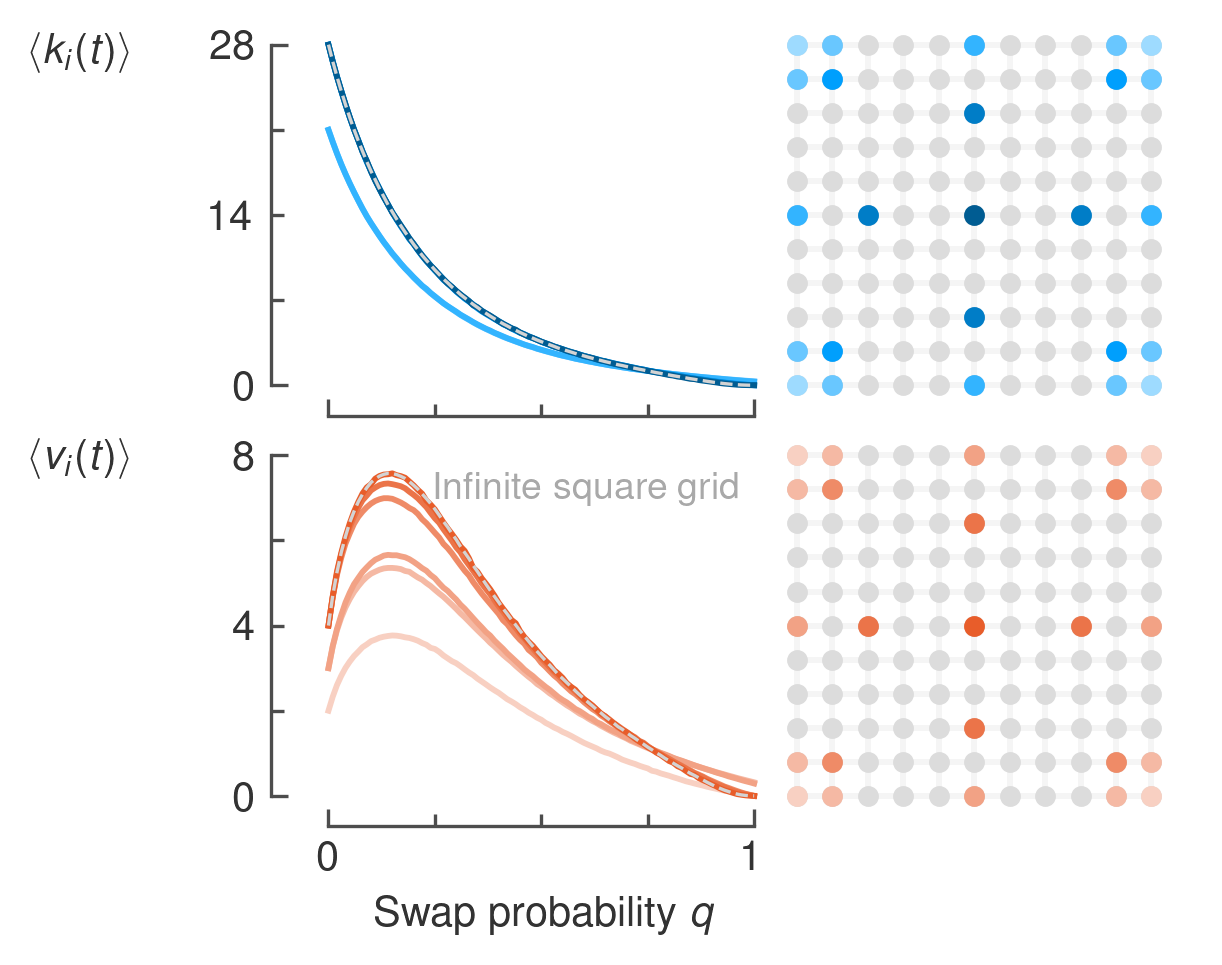

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('FOLDER_LOCATION/figure.mplstyle')

mm = 1/25.4
outward = 4
color_virtual_node_degree = '#0066A2'
color_virtual_neighbourhood_size = '#EB7246'
color_text = (0, 0, 0, 0.8)
lightness_control_k = 0.33
lightness_control_V = 0.11

y_max_k = 28
y_max_v = 8
ratio = 1.25

fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=[(157.5)*mm*0.7, 157.5*mm/16*8], sharex='col', sharey='row')

ax[0].set_aspect(1/(y_max_k*ratio))
ax[0].set_ylim([0-0.04*y_max_k, y_max_k+0.04*y_max_k])

ax[0].plot(prob_swap_range, virtual_node_degree_center_mean, '-', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*0), zorder=5)
ax[0].plot(prob_swap_range, virtual_node_degree_mid_center_mean, '-', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*1), zorder=4)
ax[0].plot(prob_swap_range, virtual_node_degree_mid_corner_mean, '-', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*2), zorder=3)
ax[0].plot(prob_swap_range, virtual_node_degree_edge_center_mean, '-', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*3), zorder=2)
ax[0].plot(prob_swap_range, virtual_node_degree_next_to_corner_mean, '-', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*4), zorder=1)

ax[0].plot(prob_swap_range, virtual_node_degree_mean_inf[2, :], '--', color='lightgray', linewidth=0.8, zorder = 11)

ax[0].spines['left'].set_position(('outward', outward))
ax[0].spines['left'].set_bounds(0, 28)
ax[0].set_yticks(ticks=[0, 28])
ax[0].set_yticks(ticks=[7, 14, 21], minor=True)
ax[0].set_yticklabels(labels=[{}, 14, {}], minor=True, ha='right')

ax[0].spines['bottom'].set_position(('outward', outward))
ax[0].spines['bottom'].set_bounds(0, 1)

ax[0].set_ylabel(r'$\langle k_i(t)\rangle$', rotation=0, y=0.885, labelpad = 17.5, ha='right')

ax[1].set_aspect(1/(y_max_v*ratio))
ax[1].set_ylim([0-0.04*y_max_v, y_max_v+0.04*y_max_v])

ax[1].plot(prob_swap_range, virtual_neighbourhood_size_center_mean, '-', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*0), zorder=5)
# ax[1].plot(prob_swap_range[np.argmax(virtual_neighbourhood_size_center_mean)], np.max(virtual_neighbourhood_size_center_mean), '.', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*0), markersize=6, markeredgewidth=0)

ax[1].plot(prob_swap_range, virtual_neighbourhood_size_mid_center_mean, '-', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*1), zorder=4)
# ax[1].plot(prob_swap_range[np.argmax(virtual_neighbourhood_size_mid_center_mean)], np.max(virtual_neighbourhood_size_mid_center_mean), '.', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*1), markersize=6, markeredgewidth=0)

ax[1].plot(prob_swap_range, virtual_neighbourhood_size_mid_corner_mean, '-', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*2), zorder=3)
# ax[1].plot(prob_swap_range[np.argmax(virtual_neighbourhood_size_mid_corner_mean)], np.max(virtual_neighbourhood_size_mid_corner_mean), '.', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*2), markersize=6, markeredgewidth=0)

ax[1].plot(prob_swap_range, virtual_neighbourhood_size_edge_center_mean, '-', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*3), zorder=2)
# ax[1].plot(prob_swap_range[np.argmax(virtual_neighbourhood_size_edge_center_mean)], np.max(virtual_neighbourhood_size_edge_center_mean), '.', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*3), markersize=6, markeredgewidth=0)

ax[1].plot(prob_swap_range, virtual_neighbourhood_size_next_to_corner_mean, '-', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*4), zorder=1)
# ax[1].plot(prob_swap_range[np.argmax(virtual_neighbourhood_size_next_to_corner_mean)], np.max(virtual_neighbourhood_size_next_to_corner_mean), '.', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*4), markersize=6, markeredgewidth=0)

ax[1].plot(prob_swap_range, virtual_neighbourhood_size_corner_mean, '-', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*5), zorder=0)
# ax[1].plot(prob_swap_range[np.argmax(virtual_neighbourhood_size_corner_mean)], np.max(virtual_neighbourhood_size_corner_mean), '.', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*5), markersize=6, markeredgewidth=0)

ax[1].plot(prob_swap_range, virtual_neighbourhood_size_mean_inf[2, :], '--', color='lightgray', linewidth=0.8, zorder = 11)


ax[1].spines['left'].set_position(('outward', outward))
ax[1].spines['left'].set_bounds(0, 8)
ax[1].set_yticks(ticks=[0, 8])
ax[1].set_yticks(ticks=[2, 4, 6], minor=True)
ax[1].set_yticklabels(labels=[{}, 4, {}], minor=True, ha='right')

ax[1].spines['bottom'].set_position(('outward', outward))
ax[1].spines['bottom'].set_bounds(0, 1)
ax[1].set_xticks(ticks=[0, 1], minor=False)
ax[1].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)

ax[1].set_ylabel(r'$\langle v_i(t) \rangle$', rotation=0, y=0.9, labelpad = 23, ha='right')
# ax[1].set_ylabel(r'$\langle |V_i(t)| \rangle$', rotation=0, y=0.89, labelpad = 12, ha='right')
ax[1].set_xlabel(r'Swap probability $q$', x=0.47, color=color_text, fontsize=10, ha='right')

for i in range(11):
    for j in range(11):
        ax[0].plot(1.1+i*1/15*ratio, j*28/10, 'o', color='gainsboro', markersize=4)
        ax[0].plot([1.1+i*1/15*ratio, 1.1+i*1/15*ratio], [0, 28], '-', color='whitesmoke', markersize=4,zorder=0)
        ax[0].plot([1.1, 1.1+10/15*ratio], [j*28/10, j*28/10], '-', color='whitesmoke', markersize=4, zorder=0)

        ax[1].plot(1.1+i*1/15*ratio, j*8/10, 'o', color='gainsboro', markersize=4)
        ax[1].plot([1.1+i*1/15*ratio, 1.1+i*1/15*ratio], [0, 8], '-', color='whitesmoke', markersize=4,zorder=0)
        ax[1].plot([1.1, 1.1+10/15*ratio], [j*8/10, j*8/10], '-', color='whitesmoke', markersize=4, zorder=0)

        
ax[0].plot(1.1+5*1/15*ratio, 5*28/10, 'o', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_V*0), markersize=4)
ax[0].plot([1.1+5*1/15*ratio, 1.1+5*1/15*ratio, 1.1+8*1/15*ratio, 1.1+2*1/15*ratio], [2*28/10, 8*28/10, 5*28/10, 5*28/10], 'o', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*1), markersize=4)
ax[0].plot([1.1+9*1/15*ratio, 1.1+9*1/15*ratio, 1.1+1*1/15*ratio, 1.1+1*1/15*ratio], [1*28/10, 9*28/10, 1*28/10, 9*28/10], 'o', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*2), markersize=4)
ax[0].plot([1.1+5*1/15*ratio, 1.1+5*1/15*ratio, 1.1+0*1/15*ratio, 1.1+10*1/15*ratio], [0*28/10, 10*28/10, 5*28/10, 5*28/10], 'o', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*3), markersize=4)
ax[0].plot([1.1+1*1/15*ratio, 1.1+9*1/15*ratio, 1.1+10*1/15*ratio, 1.1+10*1/15*ratio, 1.1+9*1/15*ratio, 1.1+1*1/15*ratio, 1.1+0*1/15*ratio, 1.1+0*1/15*ratio], [0*28/10, 0*28/10, 1*28/10, 9*28/10, 10*28/10, 10*28/10, 9*28/10, 1*28/10], 'o', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*4), markersize=4)
ax[0].plot([1.1+0*1/15*ratio, 1.1+0*1/15*ratio, 1.1+10*1/15*ratio, 1.1+10*1/15*ratio], [0*28/10, 10*28/10, 0*28/10, 10*28/10], 'o', color=adjust_lightness(color_virtual_node_degree, 0.9+lightness_control_k*5), markersize=4)
        
ax[1].plot(1.1+5*1/15*ratio, 5*8/10, 'o', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*0), markersize=4)
ax[1].plot([1.1+5*1/15*ratio, 1.1+5*1/15*ratio, 1.1+8*1/15*ratio, 1.1+2*1/15*ratio], [2*8/10, 8*8/10, 5*8/10, 5*8/10], 'o', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*1), markersize=4)
ax[1].plot([1.1+9*1/15*ratio, 1.1+9*1/15*ratio, 1.1+1*1/15*ratio, 1.1+1*1/15*ratio], [1*8/10, 9*8/10, 1*8/10, 9*8/10], 'o', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*2), markersize=4)
ax[1].plot([1.1+5*1/15*ratio, 1.1+5*1/15*ratio, 1.1+0*1/15*ratio, 1.1+10*1/15*ratio], [0*8/10, 10*8/10, 5*8/10, 5*8/10], 'o', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*3), markersize=4)
ax[1].plot([1.1+1*1/15*ratio, 1.1+9*1/15*ratio, 1.1+10*1/15*ratio, 1.1+10*1/15*ratio, 1.1+9*1/15*ratio, 1.1+1*1/15*ratio, 1.1+0*1/15*ratio, 1.1+0*1/15*ratio], [0*8/10, 0*8/10, 1*8/10, 9*8/10, 10*8/10, 10*8/10, 9*8/10, 1*8/10], 'o', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*4), markersize=4)
ax[1].plot([1.1+0*1/15*ratio, 1.1+0*1/15*ratio, 1.1+10*1/15*ratio, 1.1+10*1/15*ratio], [0*8/10, 10*8/10, 0*8/10, 10*8/10], 'o', color=adjust_lightness(color_virtual_neighbourhood_size, 0.9+lightness_control_V*5), markersize=4)

ax[1].text(0.25, 7, r'Infinite square grid', color='darkgray', fontsize = 9)

# fig.savefig('FOLDER_LOCATION/Finite networks/sweep_prob_swap_square.pdf', bbox_inches = 'tight', pad_inches=0*mm)

In [7]:
print(prob_swap_range[np.argmax(virtual_neighbourhood_size_center_mean)],
prob_swap_range[np.argmax(virtual_neighbourhood_size_mid_center_mean)],
prob_swap_range[np.argmax(virtual_neighbourhood_size_mid_corner_mean)],
prob_swap_range[np.argmax(virtual_neighbourhood_size_edge_center_mean)],
prob_swap_range[np.argmax(virtual_neighbourhood_size_next_to_corner_mean)],
prob_swap_range[np.argmax(virtual_neighbourhood_size_corner_mean)])

0.15 0.14 0.13 0.14 0.15 0.15


In [8]:
print(np.max(virtual_neighbourhood_size_center_mean), np.max(virtual_neighbourhood_size_mid_center_mean),np.max(virtual_neighbourhood_size_mid_corner_mean),
      np.max(virtual_neighbourhood_size_edge_center_mean), np.max(virtual_neighbourhood_size_next_to_corner_mean), np.max(virtual_neighbourhood_size_corner_mean))

print(np.max(virtual_neighbourhood_size_edge_center_mean)/np.max(virtual_neighbourhood_size_center_mean), 
      np.max(virtual_neighbourhood_size_corner_mean)/np.max(virtual_neighbourhood_size_center_mean))

7.57564 7.33805 6.99267 5.66101 5.35442 3.76774
0.7472649175515205 0.4973493988626703


### Distribution plot

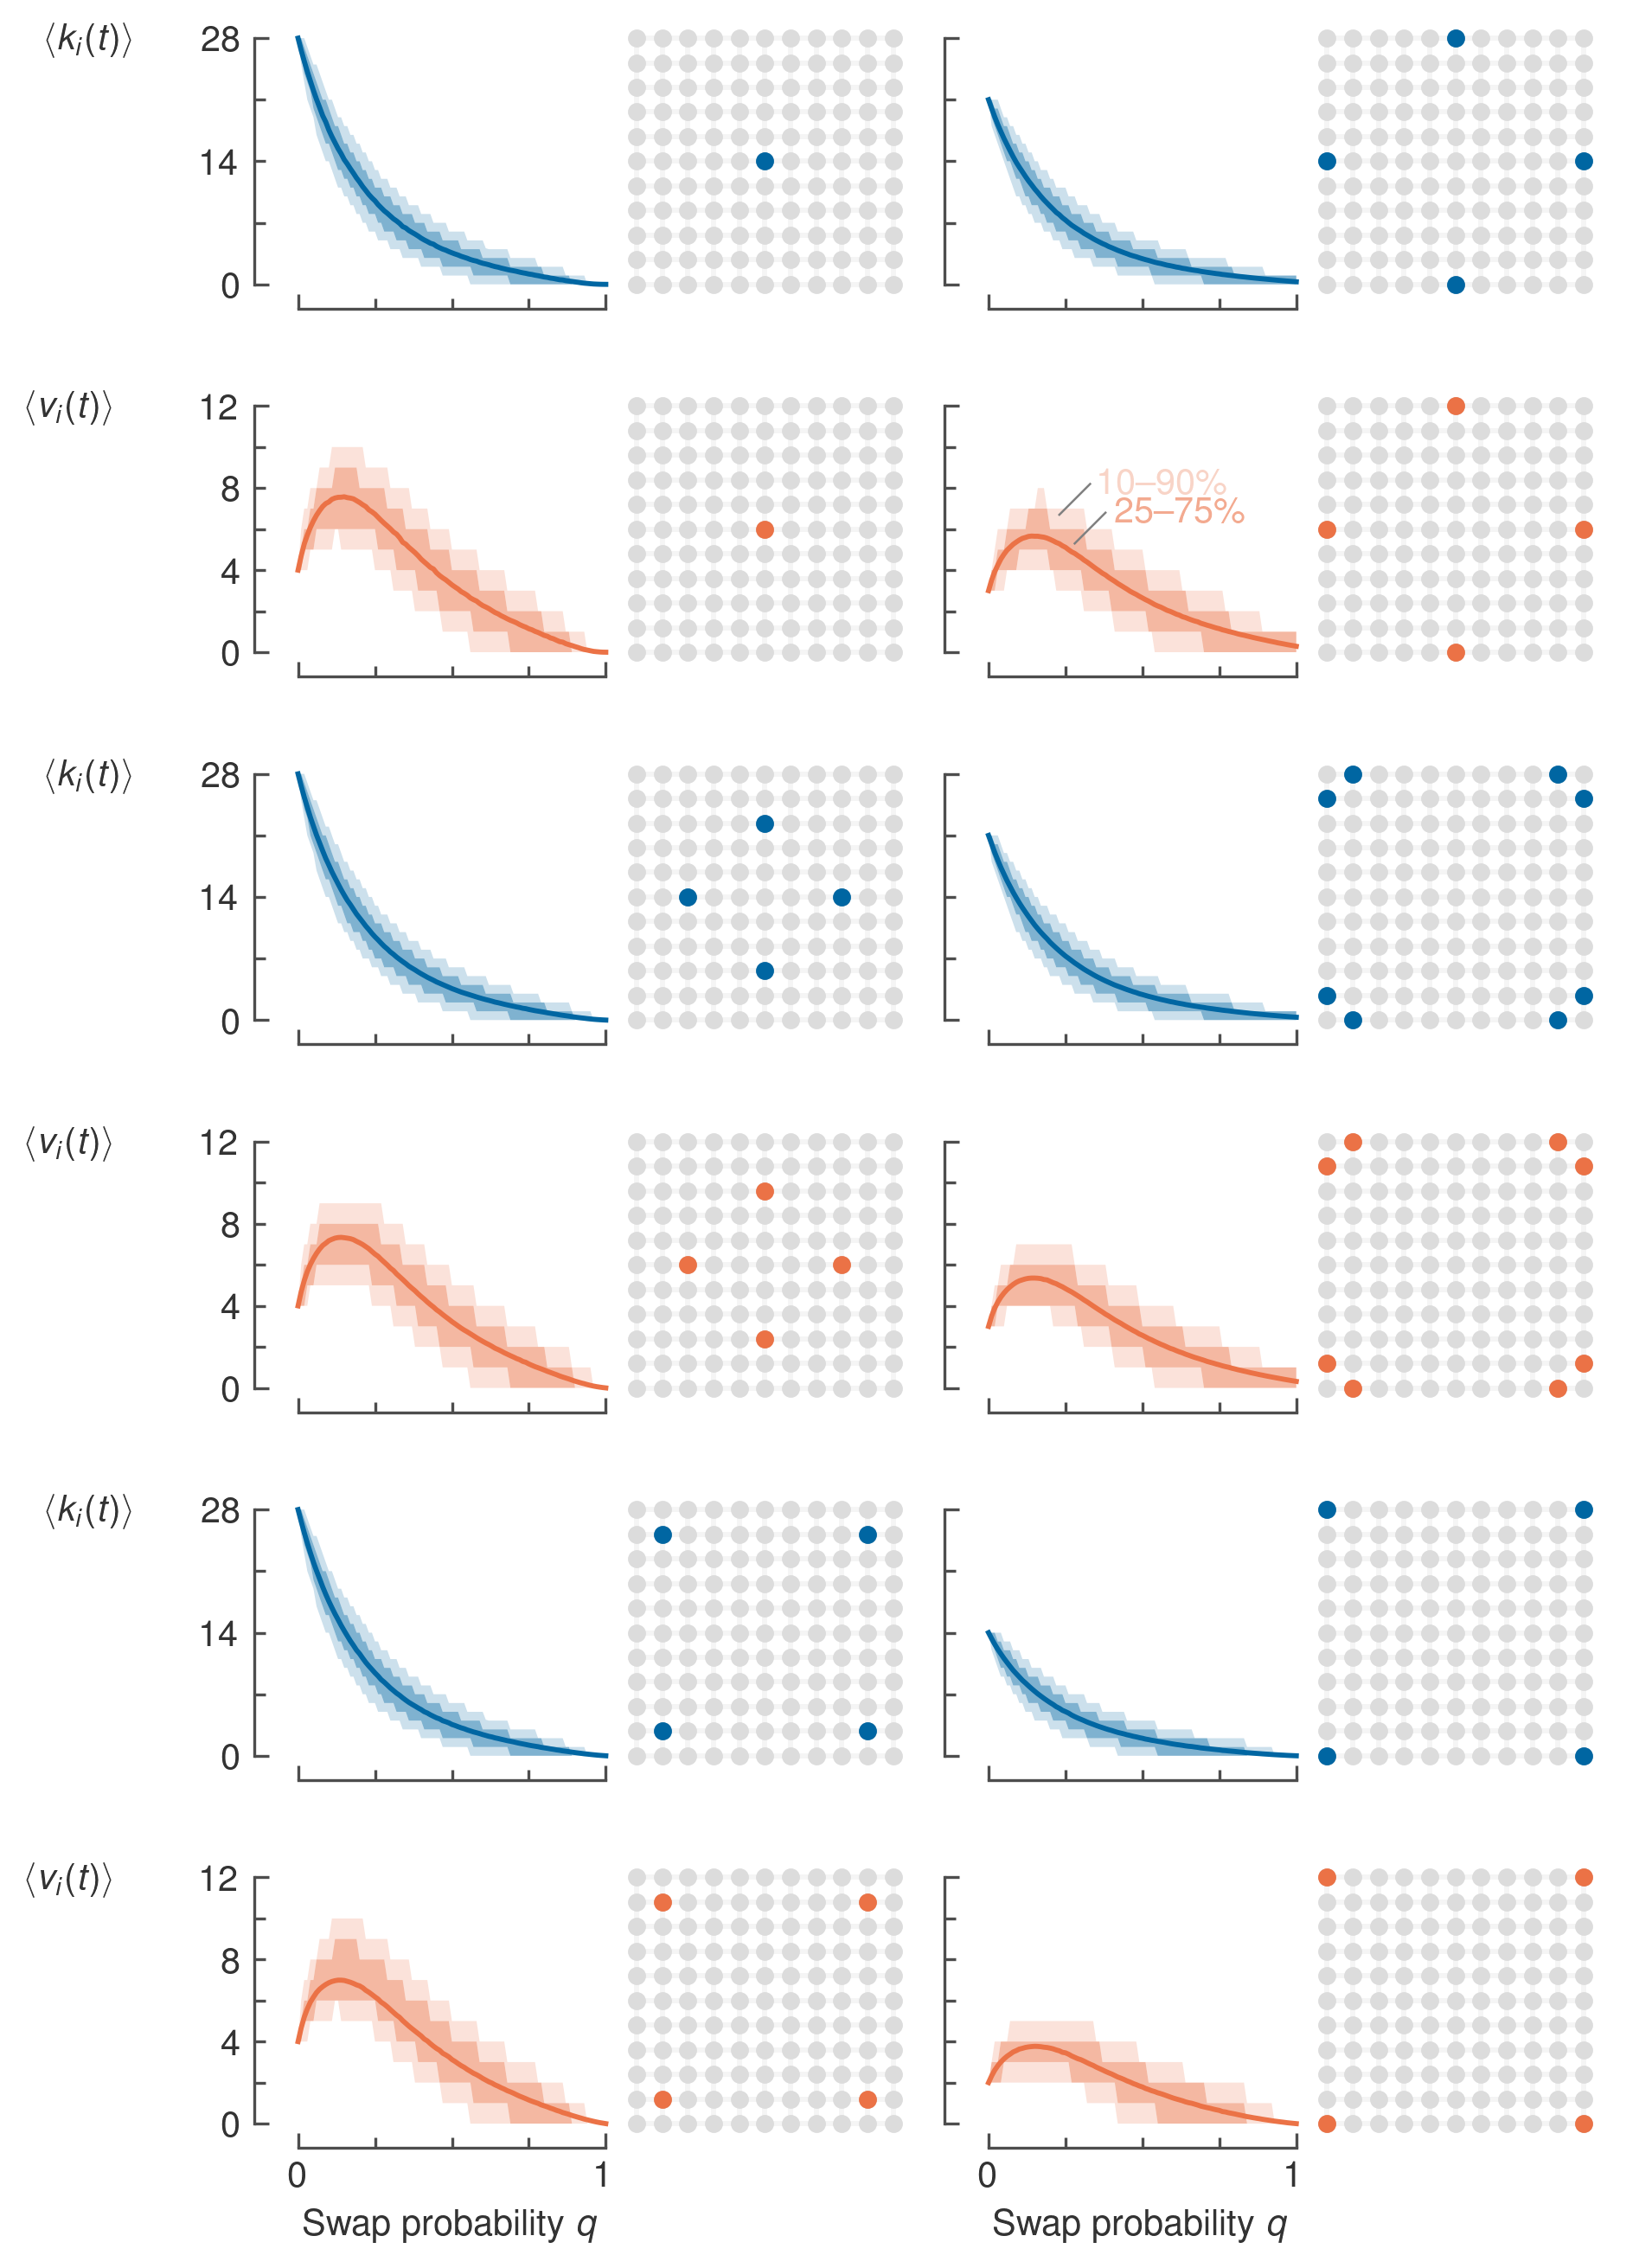

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('FOLDER_LOCATION/figure.mplstyle')


mm = 1/25.4
outward = 4
color_virtual_node_degree = '#0066A2'
color_virtual_neighbourhood_size = '#EB7246'
color_text = (0, 0, 0, 0.8)
lightness_control_k = 0.39
lightness_control_V = 0.13

y_max_k = 28
y_max_v = 12
ratio = 1.25



fig, ax = plt.subplots(6, 2, constrained_layout=True, figsize=[(157.5)*mm, 157.5*mm*np.sqrt(2)], sharex='col', sharey='row')


for i in range(3):
    for j in range(2):
        ax[2*i, j].set_aspect(1/(y_max_k*ratio))
        ax[2*i, j].set_ylim([0-0.04*y_max_k, y_max_k+0.04*y_max_k])
        
        ax[2*i, j].spines['left'].set_position(('outward', outward))
        ax[2*i, j].spines['left'].set_bounds(0, y_max_k)
        ax[2*i, j].set_yticks(ticks=[0, y_max_k])
        ax[2*i, j].set_yticks(ticks=[7, 14, 21], minor=True)
        ax[2*i, j].set_yticklabels(labels=[{}, 14, {}], minor=True, ha='right')

        ax[2*i, j].spines['bottom'].set_position(('outward', outward))
        ax[2*i, j].spines['bottom'].set_bounds(0, 1)

        ax[2*i, 0].set_ylabel(r'$\langle k_i(t)\rangle$', rotation=0, y=0.89, labelpad = 17.5, ha='right')
        
        
        
ax[0, 0].plot(prob_swap_range, virtual_node_degree_center_mean, '-', color=color_virtual_node_degree, zorder=5)
ax[0, 0].fill_between(prob_swap_range, virtual_node_degree_center_25pct, virtual_node_degree_center_75pct, facecolor=color_virtual_node_degree, alpha=0.5)
ax[0, 0].fill_between(prob_swap_range, virtual_node_degree_center_10pct, virtual_node_degree_center_25pct, facecolor=color_virtual_node_degree, alpha=0.2)
ax[0, 0].fill_between(prob_swap_range, virtual_node_degree_center_75pct, virtual_node_degree_center_90pct, facecolor=color_virtual_node_degree, alpha=0.2)

ax[2, 0].plot(prob_swap_range, virtual_node_degree_mid_center_mean, '-', color=color_virtual_node_degree, zorder=4)
ax[2, 0].fill_between(prob_swap_range, virtual_node_degree_mid_center_25pct, virtual_node_degree_mid_center_75pct, facecolor=color_virtual_node_degree, alpha=0.5)
ax[2, 0].fill_between(prob_swap_range, virtual_node_degree_mid_center_10pct, virtual_node_degree_mid_center_25pct, facecolor=color_virtual_node_degree, alpha=0.2)
ax[2, 0].fill_between(prob_swap_range, virtual_node_degree_mid_center_75pct, virtual_node_degree_mid_center_90pct, facecolor=color_virtual_node_degree, alpha=0.2)

ax[4, 0].plot(prob_swap_range, virtual_node_degree_mid_corner_mean, '-', color=color_virtual_node_degree, zorder=3)
ax[4, 0].fill_between(prob_swap_range, virtual_node_degree_center_25pct, virtual_node_degree_center_75pct, facecolor=color_virtual_node_degree, alpha=0.5)
ax[4, 0].fill_between(prob_swap_range, virtual_node_degree_center_10pct, virtual_node_degree_center_25pct, facecolor=color_virtual_node_degree, alpha=0.2)
ax[4, 0].fill_between(prob_swap_range, virtual_node_degree_center_75pct, virtual_node_degree_center_90pct, facecolor=color_virtual_node_degree, alpha=0.2)

ax[0, 1].plot(prob_swap_range, virtual_node_degree_edge_center_mean, '-', color=color_virtual_node_degree, zorder=2)
ax[0, 1].fill_between(prob_swap_range, virtual_node_degree_edge_center_25pct, virtual_node_degree_edge_center_75pct, facecolor=color_virtual_node_degree, alpha=0.5)
ax[0, 1].fill_between(prob_swap_range, virtual_node_degree_edge_center_10pct, virtual_node_degree_edge_center_25pct, facecolor=color_virtual_node_degree, alpha=0.2)
ax[0, 1].fill_between(prob_swap_range, virtual_node_degree_edge_center_75pct, virtual_node_degree_edge_center_90pct, facecolor=color_virtual_node_degree, alpha=0.2)

ax[2, 1].plot(prob_swap_range, virtual_node_degree_next_to_corner_mean, '-', color=color_virtual_node_degree, zorder=1)
ax[2, 1].fill_between(prob_swap_range, virtual_node_degree_next_to_corner_25pct, virtual_node_degree_next_to_corner_75pct, facecolor=color_virtual_node_degree, alpha=0.5)
ax[2, 1].fill_between(prob_swap_range, virtual_node_degree_next_to_corner_10pct, virtual_node_degree_next_to_corner_25pct, facecolor=color_virtual_node_degree, alpha=0.2)
ax[2, 1].fill_between(prob_swap_range, virtual_node_degree_next_to_corner_75pct, virtual_node_degree_next_to_corner_90pct, facecolor=color_virtual_node_degree, alpha=0.2)

ax[4, 1].plot(prob_swap_range, virtual_node_degree_corner_mean, '-', color=color_virtual_node_degree, zorder=0)
ax[4, 1].fill_between(prob_swap_range, virtual_node_degree_corner_25pct, virtual_node_degree_corner_75pct, facecolor=color_virtual_node_degree, alpha=0.5)
ax[4, 1].fill_between(prob_swap_range, virtual_node_degree_corner_10pct, virtual_node_degree_corner_25pct, facecolor=color_virtual_node_degree, alpha=0.2)
ax[4, 1].fill_between(prob_swap_range, virtual_node_degree_corner_75pct, virtual_node_degree_corner_90pct, facecolor=color_virtual_node_degree, alpha=0.2)

for i in range(3):
    for j in range(2):
        ax[2*i+1, j].set_aspect(1/(y_max_v*ratio))
        ax[2*i+1, j].set_ylim([0-0.04*y_max_v, y_max_v+0.04*y_max_v])
        
        ax[2*i+1, j].spines['left'].set_position(('outward', outward))
        ax[2*i+1, j].spines['left'].set_bounds(0, y_max_v)
        ax[2*i+1, j].set_yticks(ticks=[0, y_max_v])
        ax[2*i+1, j].set_yticks(ticks=[2, 4, 6, 8, 10], minor=True)
        ax[2*i+1, j].set_yticklabels(labels=[{}, 4, {}, 8, {}], minor=True, ha='right')
        
        ax[2*i+1, j].spines['bottom'].set_position(('outward', outward))
        ax[2*i+1, j].spines['bottom'].set_bounds(0, 1)


        ax[2*i+1, 0].set_ylabel(r'$\langle v_i(t) \rangle$', rotation=0, y=0.89, labelpad = 23, ha='right')

ax[1, 0].plot(prob_swap_range, virtual_neighbourhood_size_center_mean, '-', color=color_virtual_neighbourhood_size, zorder=5)
ax[1, 0].fill_between(prob_swap_range, virtual_neighbourhood_size_center_25pct, virtual_neighbourhood_size_center_75pct, facecolor=color_virtual_neighbourhood_size, alpha=0.5)
ax[1, 0].fill_between(prob_swap_range, virtual_neighbourhood_size_center_10pct, virtual_neighbourhood_size_center_25pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)
ax[1, 0].fill_between(prob_swap_range, virtual_neighbourhood_size_center_75pct, virtual_neighbourhood_size_center_90pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)

ax[3, 0].plot(prob_swap_range, virtual_neighbourhood_size_mid_center_mean, '-', color=color_virtual_neighbourhood_size, zorder=4)
ax[3, 0].fill_between(prob_swap_range, virtual_neighbourhood_size_mid_center_25pct, virtual_neighbourhood_size_mid_center_75pct, facecolor=color_virtual_neighbourhood_size, alpha=0.5)
ax[3, 0].fill_between(prob_swap_range, virtual_neighbourhood_size_mid_center_10pct, virtual_neighbourhood_size_mid_center_25pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)
ax[3, 0].fill_between(prob_swap_range, virtual_neighbourhood_size_mid_center_75pct, virtual_neighbourhood_size_mid_center_90pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)

ax[5, 0].plot(prob_swap_range, virtual_neighbourhood_size_mid_corner_mean, '-', color=color_virtual_neighbourhood_size, zorder=3)
ax[5, 0].fill_between(prob_swap_range, virtual_neighbourhood_size_center_25pct, virtual_neighbourhood_size_center_75pct, facecolor=color_virtual_neighbourhood_size, alpha=0.5)
ax[5, 0].fill_between(prob_swap_range, virtual_neighbourhood_size_center_10pct, virtual_neighbourhood_size_center_25pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)
ax[5, 0].fill_between(prob_swap_range, virtual_neighbourhood_size_center_75pct, virtual_neighbourhood_size_center_90pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)

ax[1, 1].plot(prob_swap_range, virtual_neighbourhood_size_edge_center_mean, '-', color=color_virtual_neighbourhood_size, zorder=2)
ax[1, 1].fill_between(prob_swap_range, virtual_neighbourhood_size_edge_center_25pct, virtual_neighbourhood_size_edge_center_75pct, facecolor=color_virtual_neighbourhood_size, alpha=0.5)
ax[1, 1].fill_between(prob_swap_range, virtual_neighbourhood_size_edge_center_10pct, virtual_neighbourhood_size_edge_center_25pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)
ax[1, 1].fill_between(prob_swap_range, virtual_neighbourhood_size_edge_center_75pct, virtual_neighbourhood_size_edge_center_90pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)

ax[3, 1].plot(prob_swap_range, virtual_neighbourhood_size_next_to_corner_mean, '-', color=color_virtual_neighbourhood_size, zorder=1)
ax[3, 1].fill_between(prob_swap_range, virtual_neighbourhood_size_next_to_corner_25pct, virtual_neighbourhood_size_next_to_corner_75pct, facecolor=color_virtual_neighbourhood_size, alpha=0.5)
ax[3, 1].fill_between(prob_swap_range, virtual_neighbourhood_size_next_to_corner_10pct, virtual_neighbourhood_size_next_to_corner_25pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)
ax[3, 1].fill_between(prob_swap_range, virtual_neighbourhood_size_next_to_corner_75pct, virtual_neighbourhood_size_next_to_corner_90pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)

ax[5, 1].plot(prob_swap_range, virtual_neighbourhood_size_corner_mean, '-', color=color_virtual_neighbourhood_size, zorder=0)
ax[5, 1].fill_between(prob_swap_range, virtual_neighbourhood_size_corner_25pct, virtual_neighbourhood_size_corner_75pct, facecolor=color_virtual_neighbourhood_size, alpha=0.5)
ax[5, 1].fill_between(prob_swap_range, virtual_neighbourhood_size_corner_10pct, virtual_neighbourhood_size_corner_25pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)
ax[5, 1].fill_between(prob_swap_range, virtual_neighbourhood_size_corner_75pct, virtual_neighbourhood_size_corner_90pct, facecolor=color_virtual_neighbourhood_size, alpha=0.2)

ax[5, 0].set_xticks(ticks=[0, 1], minor=False)
ax[5, 0].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)

ax[5, 1].set_xticks(ticks=[0, 1], minor=False)
ax[5, 1].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)

# ax[1].set_ylabel(r'$\langle |V_i(t)| \rangle$', rotation=0, y=0.89, labelpad = 12, ha='right')
ax[5,0].set_xlabel(r'Swap probability $q$', x=0.5, color=color_text, fontsize=10, ha='right')
ax[5,1].set_xlabel(r'Swap probability $q$', x=0.5, color=color_text, fontsize=10, ha='right')


for k in range(3):
    for l in range(2):
        for i in range(11):
            for j in range(11):
                ax[2*k, l].plot(1.1+i*1/15*ratio, j*28/10, 'o', color='gainsboro', markersize=4)
                ax[2*k, l].plot([1.1+i*1/15*ratio, 1.1+i*1/15*ratio], [0, 28], '-', color='whitesmoke', markersize=4,zorder=0)
                ax[2*k, l].plot([1.1, 1.1+10/15*ratio], [j*28/10, j*28/10], '-', color='whitesmoke', markersize=4, zorder=0)

                ax[2*k+1, l].plot(1.1+i*1/15*ratio, j*12/10, 'o', color='gainsboro', markersize=4)
                ax[2*k+1, l].plot([1.1+i*1/15*ratio, 1.1+i*1/15*ratio], [0, 12], '-', color='whitesmoke', markersize=4,zorder=0)
                ax[2*k+1, l].plot([1.1, 1.1+10/15*ratio], [j*12/10, j*12/10], '-', color='whitesmoke', markersize=4, zorder=0)

        
ax[0, 0].plot(1.1+5*1/15*ratio, 5*28/10, 'o', color=color_virtual_node_degree, markersize=4)
ax[2, 0].plot([1.1+5*1/15*ratio, 1.1+5*1/15*ratio, 1.1+8*1/15*ratio, 1.1+2*1/15*ratio], [2*28/10, 8*28/10, 5*28/10, 5*28/10], 'o', color=color_virtual_node_degree, markersize=4)
ax[4, 0].plot([1.1+9*1/15*ratio, 1.1+9*1/15*ratio, 1.1+1*1/15*ratio, 1.1+1*1/15*ratio], [1*28/10, 9*28/10, 1*28/10, 9*28/10], 'o', color=color_virtual_node_degree, markersize=4)
ax[0, 1].plot([1.1+5*1/15*ratio, 1.1+5*1/15*ratio, 1.1+0*1/15*ratio, 1.1+10*1/15*ratio], [0*28/10, 10*28/10, 5*28/10, 5*28/10], 'o', color=color_virtual_node_degree, markersize=4)
ax[2, 1].plot([1.1+1*1/15*ratio, 1.1+9*1/15*ratio, 1.1+10*1/15*ratio, 1.1+10*1/15*ratio, 1.1+9*1/15*ratio, 1.1+1*1/15*ratio, 1.1+0*1/15*ratio, 1.1+0*1/15*ratio], [0*28/10, 0*28/10, 1*28/10, 9*28/10, 10*28/10, 10*28/10, 9*28/10, 1*28/10], 'o', color=color_virtual_node_degree, markersize=4)
ax[4, 1].plot([1.1+0*1/15*ratio, 1.1+0*1/15*ratio, 1.1+10*1/15*ratio, 1.1+10*1/15*ratio], [0*28/10, 10*28/10, 0*28/10, 10*28/10], 'o', color=color_virtual_node_degree, markersize=4)
        
ax[1, 0].plot(1.1+5*1/15*ratio, 5*12/10, 'o', color=color_virtual_neighbourhood_size, markersize=4)
ax[3, 0].plot([1.1+5*1/15*ratio, 1.1+5*1/15*ratio, 1.1+8*1/15*ratio, 1.1+2*1/15*ratio], [2*12/10, 8*12/10, 5*12/10, 5*12/10], 'o', color=color_virtual_neighbourhood_size, markersize=4)
ax[5, 0].plot([1.1+9*1/15*ratio, 1.1+9*1/15*ratio, 1.1+1*1/15*ratio, 1.1+1*1/15*ratio], [1*12/10, 9*12/10, 1*12/10, 9*12/10], 'o', color=color_virtual_neighbourhood_size, markersize=4)

ax[1, 1].plot([1.1+5*1/15*ratio, 1.1+5*1/15*ratio, 1.1+0*1/15*ratio, 1.1+10*1/15*ratio], [0*12/10, 10*12/10, 5*12/10, 5*12/10], 'o', color=color_virtual_neighbourhood_size, markersize=4)
ax[3, 1].plot([1.1+1*1/15*ratio, 1.1+9*1/15*ratio, 1.1+10*1/15*ratio, 1.1+10*1/15*ratio, 1.1+9*1/15*ratio, 1.1+1*1/15*ratio, 1.1+0*1/15*ratio, 1.1+0*1/15*ratio], [0*12/10, 0*12/10, 1*12/10, 9*12/10, 10*12/10, 10*12/10, 9*12/10, 1*12/10], 'o', color=color_virtual_neighbourhood_size, markersize=4)
ax[5, 1].plot([1.1+0*1/15*ratio, 1.1+0*1/15*ratio, 1.1+10*1/15*ratio, 1.1+10*1/15*ratio], [0*12/10, 10*12/10, 0*12/10, 10*12/10], 'o', color=color_virtual_neighbourhood_size, markersize=4)

ax[1, 1].text(0.41, 6.3, r'25--75\%', ha='left', color=color_virtual_neighbourhood_size, alpha=0.6, fontsize=10)
ax[1, 1].text(0.36, 7.7, r'10--90\%', ha='left', color=color_virtual_neighbourhood_size, alpha=0.3, fontsize=10)
ax[1, 1].plot([0.23, 0.33], [6.7, 8.2], '-', color='gray', linewidth=0.6, zorder=3)
ax[1, 1].plot([0.28, 0.38], [5.3, 6.8], '-', color='gray', linewidth=0.6, zorder=3)


# fig.savefig('FOLDER_LOCATION/sweep_prob_swap_finite_square_distribution.pdf', bbox_inches = 'tight', pad_inches=0*mm)